# Week 2 Mini Project: Latency Distribution & Tail Behavior

This notebook studies **latency variability** in a fixed inference workload by
running the same computation multiple times and analyzing the resulting
latency distribution.

## Objective

In Week 1, we analyzed how latency and memory scale with model parameters.

In this experiment, we keep the workload **fixed** and study:
- Why latency varies across repeated runs
- How tail latency (p95 / p99) diverges from average latency

This reflects how real AI systems are evaluated in production.


In [ ]:
# Core libraries for tensor computation and timing
import time
import torch

# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Experiment Setup

The workload configuration is fixed to isolate system-level variability:

- Batch Size: 32
- Sequence Length: 1024
- Embedding Dimension: 512

The same matrix multiplication is executed repeatedly on CPU,
and latency is recorded for each run.

In [2]:
device = "cpu"

batch_size = 32
seq_len = 1024
dim = 512
runs = 100

## Measurement Methodology

1. Perform a warm-up run to reduce initialization overhead
2. Execute the same operation 100 times
3. Record latency for each run in milliseconds
4. Analyze statistical properties of the collected latencies

Any variation observed is due to system effects, not algorithmic changes.

In [3]:
latencies = [] # To store latency measurements

# Create random tensors for input and weights
x = torch.randn(batch_size, seq_len, dim, device=device)
W = torch.randn(dim, dim, device=device)

_ = x @ W  # Warm-up

for _ in range(runs):
    # Measure execution time of matrix multiplication
    start_time = time.time()
    _ = x @ W
    end_time = time.time()
    latencies.append((end_time - start_time) * 1000)  # Convert to milliseconds

## Raw Results Summary

Below are the **mean**, **median**, **95th percentile** and **99th percentile** latencies

In [5]:
latencies = np.array(latencies)

print(f"Mean latency   : {latencies.mean():.2f} ms")
print(f"Median latency : {np.median(latencies):.2f} ms")
print(f"p95 latency    : {np.percentile(latencies, 95):.2f} ms")
print(f"p99 latency    : {np.percentile(latencies, 99):.2f} ms")


Mean latency   : 75.34 ms
Median latency : 73.52 ms
p95 latency    : 89.33 ms
p99 latency    : 98.25 ms


| Metric | Value |
|--------|-------|
| Mean latency | 75.34 ms |
| Median latency | 73.52 ms |
| p95 latency | 89.33 ms |
| p99 latency | 98.25 ms |

These values show a clear gap between average latency and tail latency.

## Latency Distribution Visualization

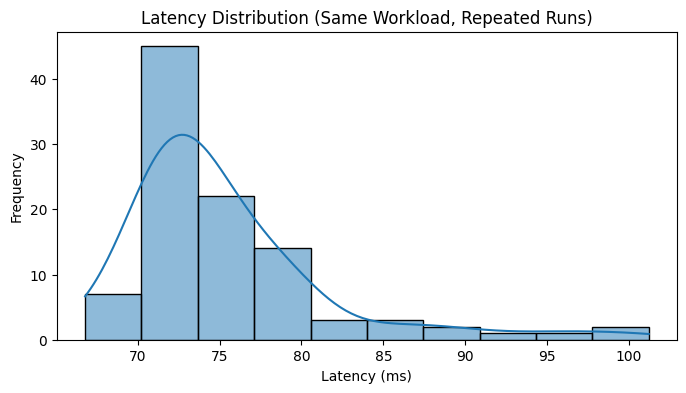

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(latencies, bins=10, kde=True)
plt.xlabel("Latency (ms)")
plt.ylabel("Frequency")
plt.title("Latency Distribution (Same Workload, Repeated Runs)")
plt.show()


## Latency Distribution

The histogram below shows the latency distribution for repeated runs
of the same workload.

Most executions cluster near the median, but a small number of runs
take significantly longer, creating a long right tail.

## Interpretation

Although the average latency appears acceptable, tail latencies
(p95 and p99) are substantially higher.

This demonstrates that:
- Latency is a distribution, not a single value
- Worst-case behavior is dominated by system-level effects


## AI Systems Engineer Takeaway

Production AI systems must be designed and evaluated using
tail latency metrics, not average latency.

OS scheduling, cache behavior, and memory contention introduce
variability that directly impacts user experience and reliability.


## Week 2 Summary

This experiment shows that even identical inference workloads
exhibit significant latency variation.

Understanding and planning for tail latency is a core responsibility
of an AI Systems Engineer.